In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
file = r"C:\Users\Mr. Jarvis\Desktop\corona virus\covid_19_data.csv"

In [3]:
file

'C:\\Users\\Mr. Jarvis\\Desktop\\corona virus\\covid_19_data.csv'

In [4]:
cv19 = pd.read_csv(file)

In [5]:
cv19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [7]:
parse_dates = cv19["Last Update"]

In [10]:
parse_dates.head()

0    1/22/2020 17:00
1    1/22/2020 17:00
2    1/22/2020 17:00
3    1/22/2020 17:00
4    1/22/2020 17:00
Name: Last Update, dtype: object

In [12]:
cv19 = pd.read_csv(file , parse_dates = ["Last Update"])

In [13]:
cv19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7009,7010,03/19/2020,NaN,Jersey,2020-03-17 18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17 16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17 21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19 12:13:38,0.0,0.0,0.0


In [14]:
cv19.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [15]:
cv19.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [16]:
cv19.isnull().sum()

SNo                  0
Date                 0
Province/State    2925
Country              0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [18]:
cv19.shape

(7014, 8)

In [19]:
cv19.dtypes

SNo                        int64
Date                      object
Province/State            object
Country                   object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [20]:
cv19.isnull().sum().to_frame("nulls")

,nulls
SNo,0
Date,0
Province/State,2925
Country,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


In [21]:
dataf = cv19.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum()

In [22]:
dataf

Confirmed  Deaths  Recovered
Date       Country                                     
01/22/2020 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0
...                              ...     ...        ...
03/19/2020 Uruguay              79.0     0.0        0.0
           Uzbekistan           23.0     0.0        0.0
           Venezuela            42.0     0.0        0.0
           Vietnam              85.0     0.0       16.0
           Zambia                2.0     0.0        0.0

[3398 rows x 3 columns]

In [23]:
dataf = cv19.groupby(["Date" , "Country"])[["Date" , "Country" , "Confirmed" , "Deaths" , "Recovered"]].sum().reset_index()

In [24]:
dataf

,Date,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,0.0,0.0,0.0
1,01/22/2020,Japan,2.0,0.0,0.0
2,01/22/2020,Macau,1.0,0.0,0.0
3,01/22/2020,Mainland China,547.0,17.0,28.0
4,01/22/2020,South Korea,1.0,0.0,0.0
...,...,...,...,...,...
3393,03/19/2020,Uruguay,79.0,0.0,0.0
3394,03/19/2020,Uzbekistan,23.0,0.0,0.0
3395,03/19/2020,Venezuela,42.0,0.0,0.0
3396,03/19/2020,Vietnam,85.0,0.0,16.0


In [29]:
cv19.groupby(["Country"])[["Deaths"]].sum()

,Deaths
Country,
Azerbaijan,0.0
"('St. Martin',)",0.0
Afghanistan,0.0
Albania,11.0
Algeria,34.0
...,...
Vatican City,0.0
Venezuela,0.0
Vietnam,0.0


In [34]:
cv19["Country"]

0              Mainland China
1              Mainland China
2              Mainland China
3              Mainland China
4              Mainland China
                ...          
7009                   Jersey
7010              Puerto Rico
7011    Republic of the Congo
7012              The Bahamas
7013               The Gambia
Name: Country, Length: 7014, dtype: object

In [43]:
cv19["Country"] == "Mainland China"

0        True
1        True
2        True
3        True
4        True
        ...  
7009    False
7010    False
7011    False
7012    False
7013    False
Name: Country, Length: 7014, dtype: bool

In [47]:
cv19.Country.value_counts(normalize=True)

Mainland China     0.256059
US                 0.206159
Australia          0.042201
Canada             0.031223
France             0.014257
                     ...   
Channel Islands    0.000143
El Salvador        0.000143
 Azerbaijan        0.000143
Chad               0.000143
('St. Martin',)    0.000143
Name: Country, Length: 184, dtype: float64

In [48]:
cv19.Confirmed.value_counts()

1.0       1378
2.0        579
3.0        299
4.0        206
5.0        167
          ... 
1209.0       1
216.0        1
864.0        1
232.0        1
515.0        1
Name: Confirmed, Length: 832, dtype: int64

In [53]:
cv19.Recovered.value_counts()

0.0       3647
1.0        745
2.0        267
4.0        170
3.0        130
          ... 
700.0        1
1304.0       1
1137.0       1
821.0        1
583.0        1
Name: Recovered, Length: 596, dtype: int64

In [54]:
cv19.groupby(["Country"])[["Recovered"]].sum()

,Recovered
Country,
Azerbaijan,0.0
"('St. Martin',)",0.0
Afghanistan,4.0
Albania,0.0
Algeria,108.0
...,...
Vatican City,0.0
Venezuela,0.0
Vietnam,518.0


In [52]:
cv19.groupby(["Country"])[["Confirmed"]].sum()

,Confirmed
Country,
Azerbaijan,1.0
"('St. Martin',)",2.0
Afghanistan,161.0
Albania,389.0
Algeria,561.0
...,...
Vatican City,4.0
Venezuela,140.0
Vietnam,1141.0


In [55]:
dataf

,Date,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,0.0,0.0,0.0
1,01/22/2020,Japan,2.0,0.0,0.0
2,01/22/2020,Macau,1.0,0.0,0.0
3,01/22/2020,Mainland China,547.0,17.0,28.0
4,01/22/2020,South Korea,1.0,0.0,0.0
...,...,...,...,...,...
3393,03/19/2020,Uruguay,79.0,0.0,0.0
3394,03/19/2020,Uzbekistan,23.0,0.0,0.0
3395,03/19/2020,Venezuela,42.0,0.0,0.0
3396,03/19/2020,Vietnam,85.0,0.0,16.0


In [58]:
sorting_By_Confirmed = cv19.sort_values('Confirmed',ascending=False)

In [59]:
sorting_By_Confirmed

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
6722,6723,03/19/2020,Hubei,Mainland China,2020-03-19 10:13:14,67800.0,3130.0,57682.0
6438,6439,03/18/2020,Hubei,Mainland China,2020-03-18 12:13:09,67800.0,3122.0,56927.0
6162,6163,03/17/2020,Hubei,Mainland China,2020-03-17 11:53:10,67799.0,3111.0,56003.0
5890,5891,03/16/2020,Hubei,Mainland China,2020-03-16 14:38:45,67798.0,3099.0,55142.0
5632,5633,03/15/2020,Hubei,Mainland China,2020-03-15 18:20:18,67794.0,3085.0,54288.0
...,...,...,...,...,...,...,...,...
2817,2818,02/29/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0
2816,2817,02/29/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0
2815,2816,02/29/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0
2814,2815,02/29/2020,From Diamond Princess,Australia,2020-02-29 02:03:10,0.0,0.0,0.0


In [60]:
sorting_By_Confirmed = sorting_By_Confirmed.drop_duplicates("Country")

In [61]:
sorting_By_Confirmed

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
6722,6723,03/19/2020,Hubei,Mainland China,2020-03-19 10:13:14,67800.0,3130.0,57682.0
6723,6724,03/19/2020,NaN,Italy,2020-03-19 17:43:03,41035.0,3405.0,4440.0
6724,6725,03/19/2020,NaN,Iran,2020-03-19 11:33:29,18407.0,1284.0,5710.0
6725,6726,03/19/2020,NaN,Spain,2020-03-19 20:13:08,17963.0,830.0,1107.0
6726,6727,03/19/2020,NaN,Germany,2020-03-19 20:13:08,15320.0,44.0,113.0
...,...,...,...,...,...,...,...,...
2684,2685,02/28/2020,NaN,North Ireland,2020-02-28 05:43:02,1.0,0.0,0.0
2663,2664,02/28/2020,NaN,Azerbaijan,2020-02-28 15:03:26,1.0,0.0,0.0
4506,4507,03/09/2020,NaN,Vatican City,2020-03-06 15:43:02,1.0,0.0,0.0
4685,4686,03/10/2020,NaN,Channel Islands,2020-03-10 05:33:02,1.0,0.0,0.0


In [63]:
Total_Conformed_From_World = sorting_By_Confirmed['Confirmed'].sum()

In [64]:
Total_Conformed_From_World

220326.0

In [65]:
Total_Deaths_From_world = sorting_By_Confirmed['Deaths'].sum()

In [66]:
Total_Deaths_From_world

9575.0

In [67]:
Total_Recovered_From_World = sorting_By_Confirmed['Recovered'].sum()

In [68]:
Total_Recovered_From_World

72078.0

In [69]:
Deaths_rate_Total_World = (Total_Deaths_From_world*100)/Total_Conformed_From_World

In [70]:
Deaths_rate_Total_World

4.34583299292866

In [71]:
Recovered_rate_Total_World = (Total_Recovered_From_World*100)/Total_Conformed_From_World

In [72]:
Recovered_rate_Total_World

32.714250701233624

In [73]:
Report_China = sorting_By_Confirmed[sorting_By_Confirmed["Country"] == "Mainland China"]

In [74]:
Report_China

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
6722,6723,03/19/2020,Hubei,Mainland China,2020-03-19 10:13:14,67800.0,3130.0,57682.0


In [75]:
China_Recovered_rate = (int(Report_China["Recovered"].values)*100)/int(Report_China["Confirmed"].values)

In [76]:
China_Recovered_rate

85.07669616519173

In [77]:
rate_of_recovered = (sorting_By_Confirmed["Recovered"]*100)/sorting_By_Confirmed["Confirmed"]

In [82]:
rate_of_recovered

6722    85.076696
6723    10.820032
6724    31.020807
6725     6.162668
6726     0.737598
          ...    
2684     0.000000
2663     0.000000
4506     0.000000
4685     0.000000
4437     0.000000
Length: 184, dtype: float64

In [84]:
rate_of_deaths = (sorting_By_Confirmed["Deaths"]*100)/(sorting_By_Confirmed["Confirmed"])

In [85]:
rate_of_deaths

6722    4.616519
6723    8.297795
6724    6.975607
6725    4.620609
6726    0.287206
          ...   
2684    0.000000
2663    0.000000
4506    0.000000
4685    0.000000
4437    0.000000
Length: 184, dtype: float64

In [87]:
rate_of_cases = (sorting_By_Confirmed["Confirmed"]*100)/Total_Conformed_From_World

In [88]:
rate_of_cases

6722    30.772582
6723    18.624674
6724     8.354438
6725     8.152919
6726     6.953333
          ...    
2684     0.000454
2663     0.000454
4506     0.000454
4685     0.000454
4437     0.000454
Name: Confirmed, Length: 184, dtype: float64

In [89]:
sorting_By_Confirmed[ " Rate Of Recovered Cases (%) " ] = pd.DataFrame(rate_of_recovered)

C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
sorting_By_Confirmed[ " Rate Of Death Cases (%) " ] = pd.DataFrame(rate_of_deaths)

C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
sorting_By_Confirmed[" Rate Of Total Cases (%) "] = pd.DataFrame(rate_of_cases)

C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
sorting_By_Confirmed

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Rate Of Recovered Cases (%),Rate Of Death Cases (%),Rate Of Total Cases (%)
6722,6723,03/19/2020,Hubei,Mainland China,2020-03-19 10:13:14,67800.0,3130.0,57682.0,85.076696,4.616519,30.772582
6723,6724,03/19/2020,NaN,Italy,2020-03-19 17:43:03,41035.0,3405.0,4440.0,10.820032,8.297795,18.624674
6724,6725,03/19/2020,NaN,Iran,2020-03-19 11:33:29,18407.0,1284.0,5710.0,31.020807,6.975607,8.354438
6725,6726,03/19/2020,NaN,Spain,2020-03-19 20:13:08,17963.0,830.0,1107.0,6.162668,4.620609,8.152919
6726,6727,03/19/2020,NaN,Germany,2020-03-19 20:13:08,15320.0,44.0,113.0,0.737598,0.287206,6.953333
...,...,...,...,...,...,...,...,...,...,...,...
2684,2685,02/28/2020,NaN,North Ireland,2020-02-28 05:43:02,1.0,0.0,0.0,0.000000,0.000000,0.000454
2663,2664,02/28/2020,NaN,Azerbaijan,2020-02-28 15:03:26,1.0,0.0,0.0,0.000000,0.000000,0.000454
4506,4507,03/09/2020,NaN,Vatican City,2020-03-06 15:43:02,1.0,0.0,0.0,0.000000,0.000000,0.000454
4685,4686,03/10/2020,NaN,Channel Islands,2020-03-10 05:33:02,1.0,0.0,0.0,0.000000,0.000000,0.000454


In [94]:
sorting_By_Confirmed.head(100).style.background_gradient(cmap = "Greens")

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Rate Of Recovered Cases (%),Rate Of Death Cases (%),Rate Of Total Cases (%)
6722,6723,03/19/2020,Hubei,Mainland China,2020-03-19 10:13:14,67800,3130,57682,85.0767,4.61652,30.7726
6723,6724,03/19/2020,nan,Italy,2020-03-19 17:43:03,41035,3405,4440,10.82,8.29779,18.6247
6724,6725,03/19/2020,nan,Iran,2020-03-19 11:33:29,18407,1284,5710,31.0208,6.97561,8.35444
6725,6726,03/19/2020,nan,Spain,2020-03-19 20:13:08,17963,830,1107,6.16267,4.62061,8.15292
6726,6727,03/19/2020,nan,Germany,2020-03-19 20:13:08,15320,44,113,0.737598,0.287206,6.95333
6727,6728,03/19/2020,France,France,2020-03-19 20:43:02,10871,243,12,0.110385,2.2353,4.93405
6728,6729,03/19/2020,nan,South Korea,2020-03-19 02:13:17,8565,91,1540,17.9802,1.06246,3.88742
6729,6730,03/19/2020,New York,US,2020-03-19 23:43:04,5365,34,0,0,0.633737,2.43503
6730,6731,03/19/2020,nan,Switzerland,2020-03-19 21:13:15,4075,41,15,0.368098,1.00613,1.84953
6731,6732,03/19/2020,United Kingdom,UK,2020-03-19 17:13:27,2689,137,65,2.41726,5.09483,1.22046


In [95]:
sorting_By_Confirmed1=sorting_By_Confirmed.head(10)

In [96]:
sorting_By_Confirmed1

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Rate Of Recovered Cases (%),Rate Of Death Cases (%),Rate Of Total Cases (%)
6722,6723,03/19/2020,Hubei,Mainland China,2020-03-19 10:13:14,67800.0,3130.0,57682.0,85.076696,4.616519,30.772582
6723,6724,03/19/2020,NaN,Italy,2020-03-19 17:43:03,41035.0,3405.0,4440.0,10.820032,8.297795,18.624674
6724,6725,03/19/2020,NaN,Iran,2020-03-19 11:33:29,18407.0,1284.0,5710.0,31.020807,6.975607,8.354438
6725,6726,03/19/2020,NaN,Spain,2020-03-19 20:13:08,17963.0,830.0,1107.0,6.162668,4.620609,8.152919
6726,6727,03/19/2020,NaN,Germany,2020-03-19 20:13:08,15320.0,44.0,113.0,0.737598,0.287206,6.953333
6727,6728,03/19/2020,France,France,2020-03-19 20:43:02,10871.0,243.0,12.0,0.110385,2.235305,4.934052
6728,6729,03/19/2020,NaN,South Korea,2020-03-19 02:13:17,8565.0,91.0,1540.0,17.980152,1.062464,3.887421
6729,6730,03/19/2020,New York,US,2020-03-19 23:43:04,5365.0,34.0,0.0,0.000000,0.633737,2.435028
6730,6731,03/19/2020,NaN,Switzerland,2020-03-19 21:13:15,4075.0,41.0,15.0,0.368098,1.006135,1.849532
6731,6732,03/19/2020,United Kingdom,UK,2020-03-19 17:13:27,2689.0,137.0,65.0,2.417255,5.094831,1.220464


In [97]:
x = sorting_By_Confirmed1.Country
y = sorting_By_Confirmed1.Confirmed

In [98]:
x

6722    Mainland China
6723             Italy
6724              Iran
6725             Spain
6726           Germany
6727            France
6728       South Korea
6729                US
6730       Switzerland
6731                UK
Name: Country, dtype: object

In [99]:
y

6722    67800.0
6723    41035.0
6724    18407.0
6725    17963.0
6726    15320.0
6727    10871.0
6728     8565.0
6729     5365.0
6730     4075.0
6731     2689.0
Name: Confirmed, dtype: float64

Text(0.5, 1.0, 'Total Number Of Cases / Deaths / Recoverd')

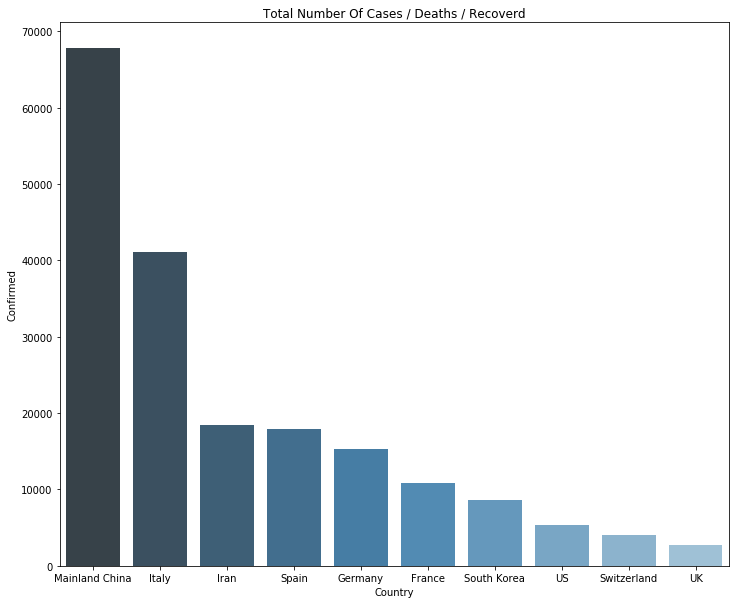

In [108]:
plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams["figure.edgecolor"] = ("Black")
sns.barplot(x,y  , palette="Blues_d").set_title("Total Number Of Cases / Deaths / Recoverd")

In [110]:
cases_on_per_Day = cv19.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()

In [111]:
cases_on_per_Day

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0
5,01/27/2020,2927.0,82.0,61.0
6,01/28/2020,5578.0,131.0,107.0
7,01/29/2020,6165.0,133.0,126.0
8,01/30/2020,8235.0,171.0,143.0
9,01/31/2020,9925.0,213.0,222.0


In [113]:
sorting_By_Confirmed2 = cases_on_per_Day.sort_values("Date" , ascending=False)

In [114]:
sorting_By_Confirmed2

,Date,Confirmed,Deaths,Recovered
57,03/19/2020,242713.0,9867.0,84962.0
56,03/18/2020,214915.0,8733.0,83313.0
55,03/17/2020,197168.0,7905.0,80840.0
54,03/16/2020,181546.0,7126.0,78088.0
53,03/15/2020,167447.0,6440.0,76034.0
52,03/14/2020,156099.0,5819.0,72624.0
51,03/13/2020,145193.0,5404.0,70251.0
50,03/12/2020,128343.0,4720.0,68324.0
49,03/11/2020,125865.0,4615.0,67003.0
48,03/10/2020,118582.0,4262.0,64404.0


In [118]:
sorted_By_Confirmed2.style.background_gradient(cmap= "Blues")

,Date,Confirmed,Deaths,Recovered
57,03/19/2020,242713,9867,84962
56,03/18/2020,214915,8733,83313
55,03/17/2020,197168,7905,80840
54,03/16/2020,181546,7126,78088
53,03/15/2020,167447,6440,76034
52,03/14/2020,156099,5819,72624
51,03/13/2020,145193,5404,70251
50,03/12/2020,128343,4720,68324
49,03/11/2020,125865,4615,67003
48,03/10/2020,118582,4262,64404


In [119]:
x = cases_on_per_Day.index

In [120]:
x

RangeIndex(start=0, stop=58, step=1)

In [121]:
y = cases_on_per_Day.Confirmed

In [124]:
y

0        555.0
1        653.0
2        941.0
3       1438.0
4       2118.0
5       2927.0
6       5578.0
7       6165.0
8       8235.0
9       9925.0
10     12038.0
11     16787.0
12     19881.0
13     23892.0
14     27636.0
15     30818.0
16     34392.0
17     37121.0
18     40151.0
19     42763.0
20     44803.0
21     45222.0
22     60370.0
23     66887.0
24     69032.0
25     71226.0
26     73260.0
27     75138.0
28     75641.0
29     76199.0
30     76843.0
31     78599.0
32     78985.0
33     79570.0
34     80415.0
35     81397.0
36     82756.0
37     84124.0
38     86013.0
39     88371.0
40     90309.0
41     92844.0
42     95124.0
43     97886.0
44    101800.0
45    105836.0
46    109835.0
47    113582.0
48    118582.0
49    125865.0
50    128343.0
51    145193.0
52    156099.0
53    167447.0
54    181546.0
55    197168.0
56    214915.0
57    242713.0
Name: Confirmed, dtype: float64

In [125]:
y1 = cases_on_per_Day.Deaths

In [126]:
y1

0       17.0
1       18.0
2       26.0
3       42.0
4       56.0
5       82.0
6      131.0
7      133.0
8      171.0
9      213.0
10     259.0
11     362.0
12     426.0
13     492.0
14     564.0
15     634.0
16     719.0
17     806.0
18     906.0
19    1013.0
20    1113.0
21    1118.0
22    1371.0
23    1523.0
24    1666.0
25    1770.0
26    1868.0
27    2007.0
28    2122.0
29    2247.0
30    2251.0
31    2458.0
32    2469.0
33    2629.0
34    2708.0
35    2770.0
36    2814.0
37    2872.0
38    2941.0
39    2996.0
40    3085.0
41    3160.0
42    3254.0
43    3348.0
44    3460.0
45    3558.0
46    3803.0
47    3996.0
48    4262.0
49    4615.0
50    4720.0
51    5404.0
52    5819.0
53    6440.0
54    7126.0
55    7905.0
56    8733.0
57    9867.0
Name: Deaths, dtype: float64

In [127]:
y2 = cases_on_per_Day.Recovered

In [128]:
y2

0        28.0
1        30.0
2        36.0
3        39.0
4        52.0
5        61.0
6       107.0
7       126.0
8       143.0
9       222.0
10      284.0
11      472.0
12      623.0
13      852.0
14     1124.0
15     1487.0
16     2011.0
17     2616.0
18     3244.0
19     3946.0
20     4683.0
21     5150.0
22     6295.0
23     8058.0
24     9395.0
25    10865.0
26    12583.0
27    14352.0
28    16121.0
29    18177.0
30    18890.0
31    22886.0
32    23394.0
33    25227.0
34    27905.0
35    30384.0
36    33277.0
37    36711.0
38    39782.0
39    42716.0
40    45602.0
41    48229.0
42    51171.0
43    53797.0
44    55866.0
45    58359.0
46    60695.0
47    62512.0
48    64404.0
49    67003.0
50    68324.0
51    70251.0
52    72624.0
53    76034.0
54    78088.0
55    80840.0
56    83313.0
57    84962.0
Name: Recovered, dtype: float64

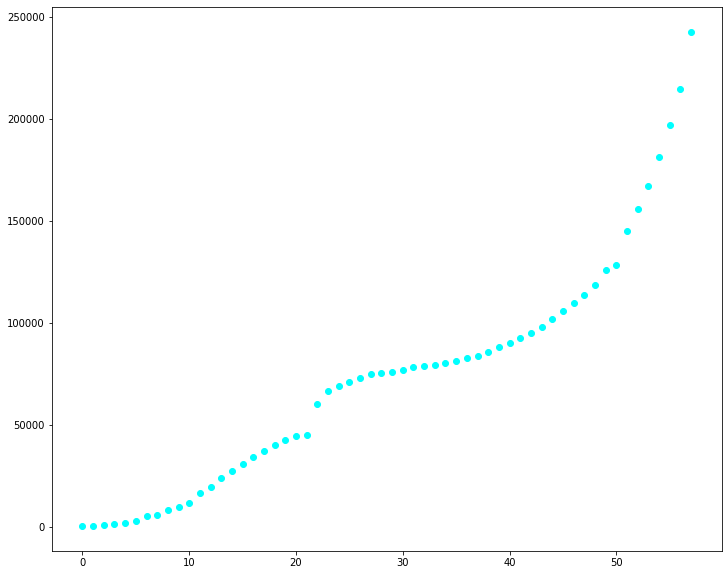

In [142]:
plt.scatter(x , y , color = "aqua" , label = "CONFORMED CASES")

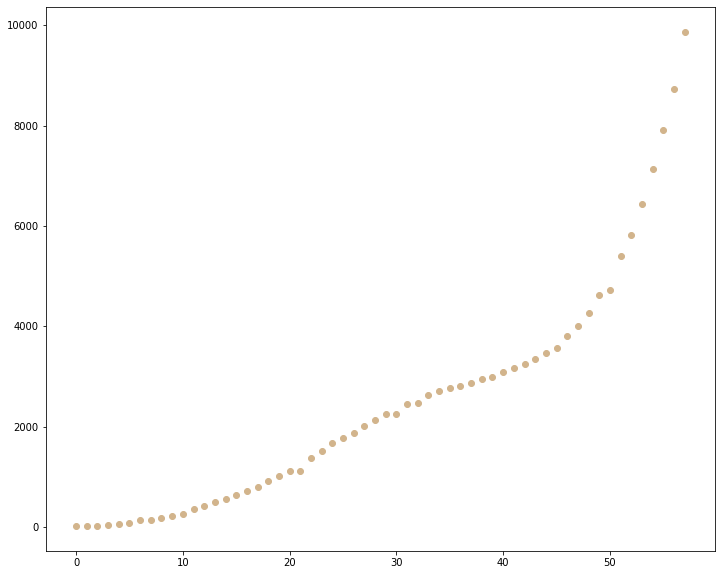

In [143]:
plt.scatter(x , y1 , color = "tan" ,label = "DEATH CASES")

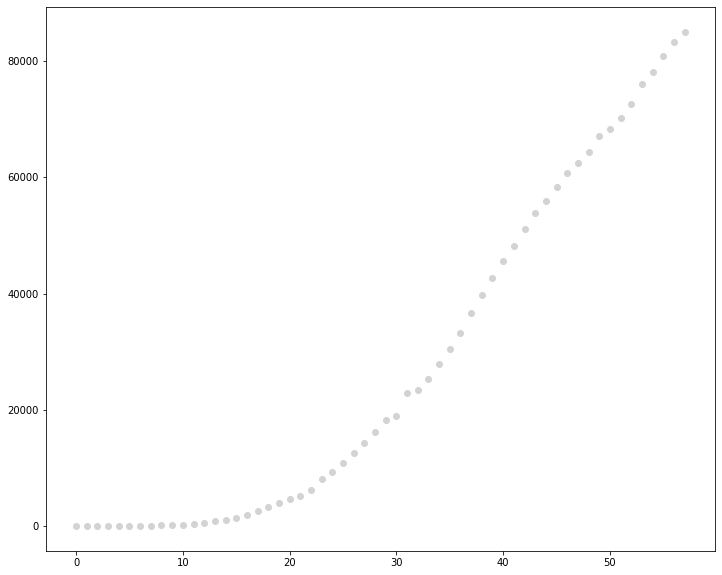

In [141]:
plt.scatter(x , y2 , color = "lightgrey" , label = "Recover cases")

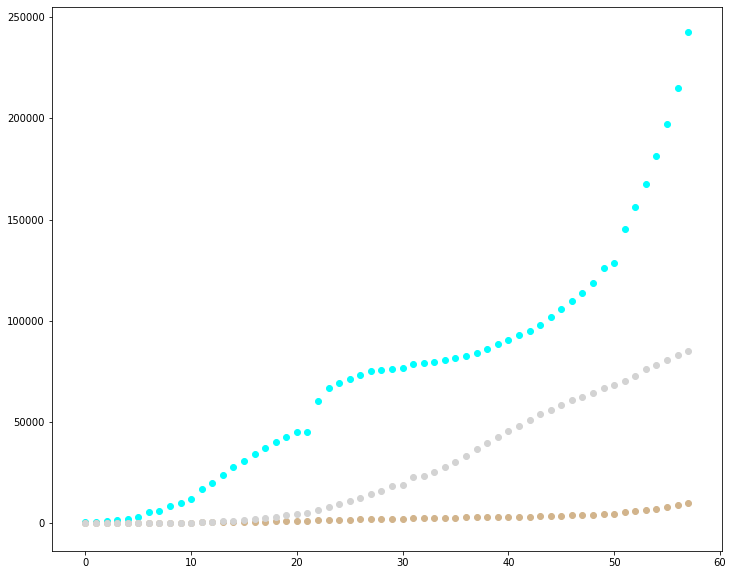

In [144]:
plt.scatter(x , y , color = "aqua" , label = "CONFORMED CASES")
plt.scatter(x , y1 , color = "tan" ,label = "DEATH CASES")
plt.scatter(x , y2 , color = "lightgrey" , label = "Recover cases")

In [145]:
x_data = pd.DataFrame(cases_on_per_Day.index)

In [146]:
x_data

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [147]:
y_data = pd.DataFrame(cases_on_per_Day.Confirmed)

In [148]:
y_data

,Confirmed
0,555.0
1,653.0
2,941.0
3,1438.0
4,2118.0
5,2927.0
6,5578.0
7,6165.0
8,8235.0
9,9925.0


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=5)

In [151]:
l_r = LinearRegression()

In [152]:
l_r

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
l_r.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
cv19_prediction = l_r.predict(x_test)

In [155]:
cv19_prediction

array([[ 82760.50343097],
       [118109.91473292],
       [ 92401.25196786],
       [147032.1603436 ],
       [156672.9088805 ],
       [ 44197.50928338],
       [121323.49757855],
       [ 66692.58920281],
       [ 57051.84066591],
       [ 73119.75489407],
       [ 50624.67497465],
       [124537.08042418]])

In [156]:
cv19_prediction_DataFrame = pd.DataFrame(cv19_prediction)

In [157]:
cv19_prediction_DataFrame

,0
0,82760.503431
1,118109.914733
2,92401.251968
3,147032.160344
4,156672.908881
5,44197.509283
6,121323.497579
7,66692.589203
8,57051.840666
9,73119.754894


In [186]:
cv19_prediction_DataFrame['Predicted Value'] = pd.DataFrame(cv19_prediction)

In [187]:
cv19_prediction_DataFrame

,0,Predicted Value
0,82760.503431,82760.503431
1,118109.914733,118109.914733
2,92401.251968,92401.251968
3,147032.160344,147032.160344
4,156672.908881,156672.908881
5,44197.509283,44197.509283
6,121323.497579,121323.497579
7,66692.589203,66692.589203
8,57051.840666,57051.840666
9,73119.754894,73119.754894


In [189]:
cv19_prediction_DataFrame

,0,Predicted Value,Real Value
0,82760.503431,82760.503431,NaN
1,118109.914733,118109.914733,14.0
2,92401.251968,92401.251968,NaN
3,147032.160344,147032.160344,NaN
4,156672.908881,156672.908881,NaN
5,44197.509283,44197.509283,NaN
6,121323.497579,121323.497579,2.0
7,66692.589203,66692.589203,NaN
8,57051.840666,57051.840666,4.0
9,73119.754894,73119.754894,1.0


In [158]:
from sklearn.metrics import r2_score

In [159]:
print("Linear Regession R2 Score : ", r2_score(y_test, cv19_prediction))

Linear Regession R2 Score :  0.8508545655565409


In [161]:
from sklearn.metrics import confusion_matrix, classification_report

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [166]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [167]:
cv19_rmse = np.sqrt(mean_squared_error(y_test , cv19_prediction))

In [168]:
cv19_rmse

14592.091319948291

In [169]:
cv19_rmse1 = mean_squared_error(y_test , cv19_prediction)

In [170]:
cv19_rmse1

212929129.08971024

In [171]:
cv19_rmse2 = mean_absolute_error(y_test , cv19_prediction)

In [172]:
cv19_rmse2

11481.791591068462

In [179]:
pd.DataFrame(cv19_prediction).to_csv("cv19_prediction_values.csv",index=False)